# Compliance Radar



### 1. EDA

In [71]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("org_compliance_data.db")

---
>##### Since .db files can contain many datasets, we first check how many tables there are
---

In [74]:
#list all the datasets in 'org_compliance_data.db'
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                       name
0               departments
1  risk_summary_by_division
2     high_risk_departments
3           data_dictionary


In [76]:
# Connect to your database
conn = sqlite3.connect("org_compliance_data.db")

# List of tables
tables = ["departments", "high_risk_departments", "risk_summary_by_division", "data_dictionary"]

# Set display options to show all columns
pd.set_option('display.max_columns', None)     # show all columns
pd.set_option('display.width', None)           # auto-adjust width
pd.set_option('display.max_colwidth', None)    # show full content in each cell

# Loop through tables and show first 5 rows
for table in tables:
    print(f"\n{'='*50}")
    print(f"Table: {table}")
    print("="*50)
    
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 6;", conn)
    display(df)   # nicely formatted table in Jupyter


Table: departments


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1620,Core Compliance,Financial_Reporting,Corporate_HQ,Operations,8.0,Remote,Large,Centralized,2.0,2.0,Other,Other,Restructuring,Internal_Audit,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,3.0,2.0,3.0,1.0,NaN,5.0,NaN,55.0,55.0,65.0,12.0
1,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
2,DEPT-4917,Central Hub,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEPT-6959,Compliance - Legacy Region,Financial_Reporting,Corporate_HQ,Support,8.0,Urban,Large,Centralized,4.0,3.0,Other,Other,Regulation,Internal_Audit,1.0,60.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,1.0,5.0,2.0,70.0,75.0,85.0,11.0
4,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0
5,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,1.0,Administrative,Other,Regulation,None,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0



Table: high_risk_departments


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
1,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0
2,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,1.0,Administrative,Other,Regulation,None,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0
3,DEPT-2554,Central Team,Financial_Reporting,Corporate_HQ,Support,5.0,Urban,Small,Autonomous,3.0,3.0,Other,None,Merger,Internal_Audit,1.0,20.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,3.0,4.0,4.0,4.0,1.0,0.0,65.0,60.0,65.0,40.0
4,DEPT-3151,Compliance - East Region,Financial_Reporting,Corporate_HQ,None,8.0,Urban,Small,Centralized,3.0,3.0,Operations,Finance,Restructuring,External_Auditor,1.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,3.0,2.0,4.0,NaN,4.0,4.0,10.0,50.0,50.0,50.0,35.0
5,DEPT-3953,Compliance - Emerging Region,Financial_Reporting,Corporate_HQ,Support,6.0,Urban,Small,Centralized,2.0,2.0,Administrative,Other,Regulation,Internal_Audit,1.0,40.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,NaN,0.0,4.0,3.0,4.0,1.0,2.0,2.0,6.0,65.0,55.0,55.0,18.0



Table: risk_summary_by_division


,division,avg_compliance_score,std_compliance_score,min_compliance_score,max_compliance_score,total_violations,avg_risk_score,dept_count
0,Corporate_HQ,63.245477,13.369017,0.0,95.0,122.0,24.463636,428
1,Regional_Operations,76.054167,13.777896,50.8,100.0,55.0,64.000000,27



Table: data_dictionary


,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,"Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)"
3,departments,division,string,"Organizational division (Corporate_HQ, Regional_Operations)"
4,departments,dept_type,string,"Department type (Operations, Support, Compliance, Finance, Technology, Legal)"
5,departments,dept_age_years,integer,Age of department in years since establishment


---
>##### We can see that there are 4 tables:
>
>- departments (the main table describing departments)
>
>- high_risk_departments (subset of the 'departments' table describing only risky departments)
>
>- risk_summary_by_division (shows information about divisions, and divisions contain departments)
>
>- data_dictionary (explains variables)
>
>  Since we want to explore all the variables, we want to see the full dictionary table:
---

In [79]:
#full data_dictionary table
df_dict = pd.read_sql_query("SELECT * FROM data_dictionary;", conn)

pd.set_option('display.max_columns', None)     
pd.set_option('display.max_rows', None)       
pd.set_option('display.width', None)           
pd.set_option('display.max_colwidth', None)    

display(df_dict)

,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,"Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)"
3,departments,division,string,"Organizational division (Corporate_HQ, Regional_Operations)"
4,departments,dept_type,string,"Department type (Operations, Support, Compliance, Finance, Technology, Legal)"
5,departments,dept_age_years,integer,Age of department in years since establishment
6,departments,location_type,string,"Geographic location type (Urban, Remote, Suburban, International)"
7,departments,team_size,string,"Team size category (Small, Medium, Large)"
8,departments,reporting_structure,string,"Reporting hierarchy (Centralized, Autonomous, Hybrid)"
9,departments,manager_experience_level,integer,Manager experience level (0=none to 4=extensive)


---
>#### From the dictionary we can see:
>
>There are variables that help us identify departments:
>- `dept_id`
>- `dept_name`
>- `dept_category`: In this project our main character will be compliance. Compliance = the rules are followed. Non-compliance = the rules are not followed. What rules? Rules can be different and they are set by the company we are doing the project for. We don't know them. But we know the groups of these topics (from dept_categpry): Financial_Reporting, Operational_Compliance, Risk_Management. This means that workers in some departments deal each with one of these three groups of rules. So potentially, it can be harder to deal with one of the groups than with the others, so the non-compliance level for these departments can be higher.
>- `division`: departments belong to either of two divisions
>- `dept_type`: what the department does in general: Operations, Support, Compliance, Finance, Technology, Legal. Again, potentially, it can be more difficult to follow rules when dealing with, for example, operations so the non-compliance level will be higher for these departments.
>
>Variables that give us understanding of structure and context of the departments:
>
>- `dept_age_years`
>- `location_type`
>- `team_size`
>- `reporting_structure`: how compliance reports are organized (Centralized, Autonomous, Hybrid)
>- `manager_experience_level`
>- `supervisor_experience_level`
>- `primary_function`: what exactly the department does (IT support, Audit, Reporting, etc) first
>- `secondary_function`what the department does after the primary_function
>- `creation_reason`: why the department was created
>- `oversight_body`: who monitors the department(Internal_Audit, External_Auditor, Compliance_Officer, Board_Committee) - who checks that the rules are followed
>
>Variables that give us information on how the compliance is being treated:
>
>- `reporting_lag_days`: average delay in compliance report, so high level may be correlated with non-compliance
>- `training_hours_quarterly`: how much compliance training (in hours) the department received
>- `violations_past_3years`: direct indicator of past violations in the department
>- `remediation_plan_active`: shows if there is an active plan to fix compliance issues.
>- `executive_support`
>- `external_consulting`
>- `engagement_programs`: whether there are active employee engagement programs
>- `onboarding_program` the department has a structured onboarding program for new employees about compliance rules
>- `improvement_commitment`
>- `digital_systems`: whether the department uses software/tools to manage compliance
>- `external_partnerships`: whether the department collaborates with external entities for compliance (like hiring external consultants)
>
>'Soft' indexes, like soft skills of departments:
>
>- `interdept_collaboration_score`: does this department collaborate with other departments?
>- `resource_availability_score`: how well it collaborates with other departments
>- `external_interactions_frequency`: how often the department interacts with external stakeholders (Frequent interactions may improve compliance awareness, but increase exposure if mismanaged)
>
> Risk and health:
>- `risk_exposure_operational`: how likely an operational miskate or failure can happen. For example, is the operation of this department is mostly manual then the likelihood of a mistake is higher than for departments with automated work.
>- `risk_exposure_financial`: potential financial impact of the department's actions. Finance department->5, IT->1
>- `operational_health_index`: how well the department runs its processes
>- `reporting_gaps_annual`: missed or incomplete reports per year
>- `audit_score_q1`: how well the department passes the Q1 audit
>- `audit_score_q2`: how well the department passes the Q2 audit
>- `compliance_score_final`: Overall compliance rating for the year. PRIMARY TARGET
>- `overall_risk_score`: Weighted score combining operational, financial, and other risk factors.
---
> There are many variables that could possibly affect the non-compliance. But what is non-compliance? As the dictionary table explains, there already exist two main scores assosiated with compliance and overall risk: compliance_score and the overall_risk_score. What is the difference between them?
> 
> Hypothesis: `compliance_score` is the overall compliance rating, so the compliance was already measures for the chosen department. `overall_risk_score` includes risks, but not only for non-compliance. Possibly also financial risk, operatrional risk, etc.
>
> We will find the exact correlations later in the EDA.
---

## EDA

> We have three tables.
> 
> The main table for us is the `departments` table.
>
> The `high_risk_departments` table contains departments already selected as high risky.
>
>- Hypothesys: not only because of the overall_risk_score.
>
> So if we understand why, by comparing these values to the values of other, not risky departments, we can find the difference and what makes departments risky.
>
> The `risk_summary_by_division` table gives us information not about departments' but about divisions' risk summary. So it operates on the higher level summarizing the contribute of all departments belonging to the particular division. We can use it to compare divisions and say:
>- Hypothesis: if a department belongs to one division, it is potentially in righer risk.
>  
>  Risk of what? Not only non-compliance but the overall risk. So again, we need to distinct the compliance part from the overall risk as our primary goal to detect non-compliance and predict.

### 1.1 Shape

In [54]:
departments = pd.read_sql_query("SELECT * FROM departments;", conn)

print("Departments shape:", departments.shape)

Departments shape: (709, 37)


In [56]:
print("\nColumn types:\n", departments.dtypes)


Column types:
 dept_id                             object
dept_name                           object
dept_category                       object
division                            object
dept_type                           object
dept_age_years                     float64
location_type                       object
team_size                           object
reporting_structure                 object
manager_experience_level           float64
supervisor_experience_level        float64
primary_function                    object
secondary_function                  object
creation_reason                     object
oversight_body                      object
reporting_lag_days                 float64
training_hours_quarterly           float64
violations_past_3years             float64
remediation_plan_active            float64
executive_support                  float64
external_consulting                float64
engagement_programs                float64
onboarding_program                 flo

---
>We see that we have variables of two types: numeric (float64) and categorical(object).
>
>For categorical we can do groupings, counts, bar plots, or encoding for modeling.
>
>For numeric we can do statistical analysis, correlations, scatterplots.
---

### 1.2 Missing Values

In [62]:
# Count missing values per column
missing_counts = departments.isnull().sum()
missing_percent = (missing_counts / len(departments) * 100).round(2)

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

display(missing_summary)

,missing_count,missing_percent
digital_systems,304,42.88
external_interactions_frequency,303,42.74
interdept_collaboration_score,303,42.74
oversight_body,303,42.74
violations_past_3years,303,42.74
onboarding_program,302,42.60
overall_risk_score,300,42.31
training_hours_quarterly,300,42.31
team_size,300,42.31
external_partnerships,300,42.31


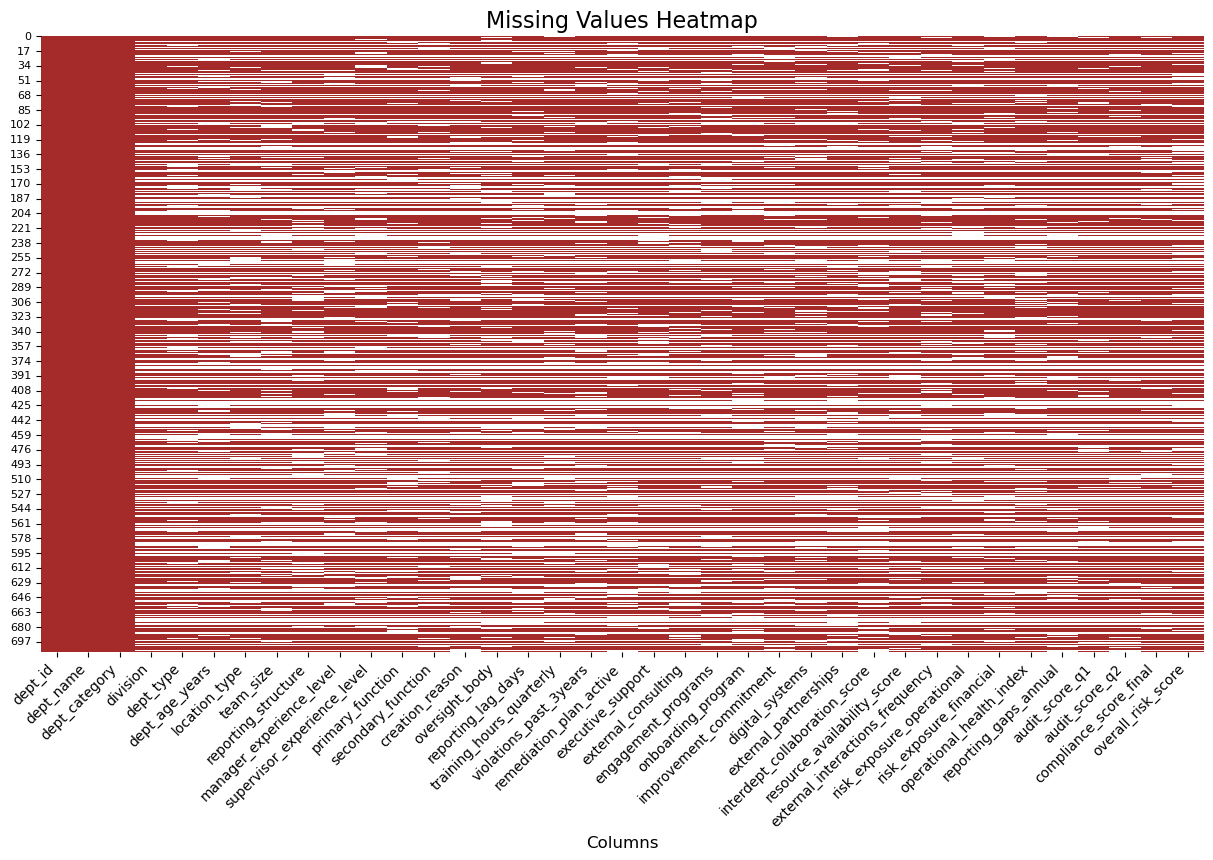

In [150]:
plt.figure(figsize=(15,8))
sns.heatmap(
    departments.isnull(), 
    cbar=False, 
    cmap=sns.color_palette(["brown", "white"])
)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

plt.show()

---
> There is substantial missing data in the dataset (around 35–42% per column).
>
> However, our key categorical identifier variables — dept_id, dept_name, and dept_category — contain no missing values.
>
> Because these columns are complete, we can reliably group the dataset by these identifiers to examine whether the missingness in other variables is associated with specific departments or department categories to see if missing data is random or systematically related to certain groups of observations.
---

#### Missingness by dept_category

In [167]:
missing_by_category = departments.groupby('dept_category').apply(
    lambda x: x.isnull().sum(),
    include_groups=False
)
display(missing_by_category)

,dept_id,dept_name,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
dept_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Financial_Reporting,0,0,0,37,39,39,42,40,39,45,34,39,40,46,42,42,47,42,41,39,41,47,38,44,41,45,40,48,34,39,41,40,21,18,17,42
Operational_Compliance,0,0,254,255,254,255,256,255,255,254,256,254,254,254,254,255,255,254,254,254,257,255,254,255,257,255,255,254,256,255,256,255,256,254,255,254
Risk_Management,0,0,0,4,5,5,2,1,2,1,3,1,3,3,1,3,1,2,1,2,1,0,0,5,2,3,4,1,3,5,1,2,2,2,4,4


---
>Here we see a pattern: most data is missing for 'Operational_Compliance'. Then data is sometimes missing for 'Financial_Reporting' and rarely missing for 'Risk_Management' category. These are the categories of rules that departments have to deal with. Therefore, when departments deal with 'Operational_Compliance' rules, the data becomes missing. Why? What is the correlation between the data being missing and this type of rules?
>
>Also because missingness depends on dept_category:
>- Simple mean/median imputation will create bias and imputation must be stratified by dept_category
>- Models must include dept_category (or they will be biased)
>- Some columns may be useless for some categories (e.g., Operational_Compliance too missing)
---

---
> 'divisions' has the least percent of missing values (35.83) out of all columns with missing values, therefore, we can check the missingness by division too.
---

#### Missingness by division

In [192]:
missing_by_category = departments.groupby('division').apply(
    lambda x: x.isnull().sum(),
    include_groups=False
)
display(missing_by_category)

,dept_id,dept_name,dept_category,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Corporate_HQ,0,0,0,38,40,40,44,38,41,44,33,38,42,47,42,43,46,42,42,39,44,46,36,46,45,46,42,47,36,39,43,39,22,17,19,43
Regional_Operations,0,0,0,4,4,5,2,4,1,2,6,2,1,2,1,3,3,2,0,2,1,2,2,4,1,3,3,2,3,6,1,4,3,3,3,3


---
> Here we see another pattern: 'Corporate_HQ' division misses far more values than Regional_Operations. Why? Is there an overlap with 'Operational_Compliance' type of rules?
---

In [214]:
overlap_table = pd.crosstab(departments['dept_category'], departments['division'])
display(overlap_table)

division,Corporate_HQ,Regional_Operations
dept_category,,
Financial_Reporting,409,10
Operational_Compliance,7,5
Risk_Management,12,12


---
> This overlap table shows that most Financial_Reporting departments are in Corporate_HQ. Operational_Compliance departments are few and spread across both divisions. Therefore, the high missing data in Corporate_HQ is mostly associated with Financial_Reporting departments, not Operational_Compliance.
>
> Also because missingness depends on division:
>- Simple mean/median imputation will create bias 
>- Models must include division (or they will be biased)
---

---
> Overall, as we miss a lot of data, some viariables can be dropped but the others should be imputed.
>
> And now we have additional questions regarding correlation between the missing data, compliance, and risks.
>
> We should see the correlation analysis not only to answer these questions but to also find which missing data can be dropped and which should be imputed and for what purposes.
---

In [297]:

# 1. Calculate the total count of missing values (NaNs) across all columns for each row
departments['missing_count_per_row'] = departments.isnull().sum(axis=1)

# 2. Group the data by the identified structural factor (dept_category)
#    and calculate the average number of missing features within that group
missing_summary_by_category = departments.groupby('dept_category')['missing_count_per_row'].mean().sort_values(ascending=False)

print("Average Missing Features by Department Category:")
# The 'display' function might not work in all environments, so we use print and rely on the user's original environment for display.
display(missing_summary_by_category)

# Expected result confirms the EDA: Operational Compliance departments have a much higher
# average number of missing features than other categories.

Average Missing Features by Department Category:


dept_category
0    14.150917
Name: missing_count_per_row, dtype: float64

In [299]:
# Identify critical fields where non-reporting is a strong risk signal
critical_risk_features = ['audit_score_q1', 'reporting_lag_days', 'violations_past_3years']

for feature in critical_risk_features:
    # Create a new binary column named 'feature_missing'
    #.isna() returns True (which is converted to 1.0) for missing values
    departments[f'{feature}_missing'] = departments[feature].isna().astype(float)

# Display the result for a sample column
print("\nNew Feature Flag for Audit Score Missingness:")
print(departments[['audit_score_q1', 'audit_score_q1_missing']].head(10))

# Result: If the audit score is missing (NaN), the new flag column will be 1.0 (Risk Signal ON)


New Feature Flag for Audit Score Missingness:
   audit_score_q1  audit_score_q1_missing
0            55.0                     0.0
1             NaN                     1.0
2             NaN                     1.0
3            70.0                     0.0
4            45.0                     0.0
5            45.0                     0.0
6             NaN                     1.0
7            65.0                     0.0
8            65.0                     0.0
9             NaN                     1.0
